# Quantum Dice

You are given several unusual 3-sided dice which, when rolled, show either 1, 2, or 3 spots.

There are three games played iwth these dice: *Distinguishable*, *Bosons*, and *Fermioons*. In each of htese games, the player rolls one die at a time, starting over if requird by the rules, until a legal combination occurs. In *Distinguishable*, all rolls are legal. In *Bosons*, a roll is legal only if the new number is larger or equal to the preceding number. In *Fermions*, a roll is legal only if hte new number is strictly larger than the preceding number.

See figure for table of possibilities after rolling two dice.

Our dice rules ar ethe same ones that govern quantum statistics of identical particles.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
from numpy.random import randint
from numpy.random import seed

In [6]:
# Define classification functions

def roll_is_dist(roll):
    """Return a boolean: can this roll outcome be classified as 'distinguishable'
    """
    return True

def roll_is_ferm(roll):
    """Return a boolean: can this roll outcome be classified as 'fermi'
    """
    ndice = len(roll)
    is_fermi = True
    # Ensure that roll j+1 >= roll j
    for j in range(len(roll)-1):
        if(roll[j+1] <= roll[j]):
            is_fermi = False
            break
    return is_fermi

def roll_is_bos(roll):
    """Return a boolean: can this roll outcome be classified as 'boson'
    """
    ndice = len(roll)
    is_bos = True
    # Ensure that roll j+1 > roll j
    for j in range(len(roll)-1):
        if(roll[j+1] < roll[j]):
            is_bos = False
            break
    return is_bos

print("Should see 3 True values:")
print(roll_is_dist(np.array([3,2,1])))
print(roll_is_bos(np.array([1,1,2])))
print(roll_is_ferm(np.array([1,2,3])))

Should see 3 True values:
True
True
True


In [8]:
# Define roll functions

def quantum_rolls(n, ndice, rolltype):
    """Roll ndice dice n times the game rolltype
    """
    if(rolltype is 'dist' or rolltype is 'distinguishable'):
        return dist_rolls(n, ndice)
    elif(rolltype is 'ferm' or rolltype is 'fermion'):
        return ferm_rolls(n, ndice)
    elif(rolltype is 'bos' or rolltype is 'boson'):
        return bos_rolls(n, ndice)
    else:
        raise Exception("Roll type not recognized: %s"%(rolltype))
    
def dist_rolls(n, ndice):
    """Roll ndice dice n times for the game 'distinguishable'
    """
    return randint(1, 3+1, size=(n,ndice))

def ferm_rolls(n, ndice):
    """Roll ndice dice n times for the game 'fermi'
    """
    if(ndice>3):
        raise Exception("Error: max 3 dice, you specified %d"%(ndice))
    rolls = []
    for i in range(n):
        # Keep rolling until we get a 'fermi' roll
        roll = randint(1, 3+1, size=(ndice,))
        while(roll_is_ferm(roll) is False):
            roll = randint(1, 3+1, size=(ndice,))
        # Add it to list of rolls results
        rolls.append(roll)
    rolls = np.array(rolls)
    return rolls

def bos_rolls(n, ndice):
    """Roll ndice dice n times for the game 'boson'
    """
    rolls = []
    for i in range(n):
        # Keep rolling until we get a 'boson' roll
        roll = randint(1, 3+1, size=(ndice,))
        while(roll_is_bos(roll) is False):
            roll = randint(1, 3+1, size=(ndice,))
        # Add it to the list of rolls results
        rolls.append(roll)
    rolls = np.array(rolls)
    return rolls

In [10]:
quantum_rolls(5, 3, 'dist')

array([[2, 3, 2],
       [2, 2, 2],
       [1, 2, 3],
       [2, 1, 1],
       [1, 1, 3]])

In [12]:
quantum_rolls(5, 3, 'bos')

array([[3, 3, 3],
       [1, 2, 3],
       [1, 1, 2],
       [3, 3, 3],
       [2, 2, 2]])

In [14]:
quantum_rolls(5, 2, 'ferm')

array([[1, 3],
       [1, 3],
       [1, 2],
       [1, 2],
       [2, 3]])

In [16]:
# Define score functions

def get_outcomes():
    return np.array([[2,3,4],[3,4,5],[4,5,6]])

def roll_dice(n):
    return randint(1,3+1,size=(n,3))

def dist_score_outcomes(roll1,roll2):
    return get_outcomes()[roll1-1][roll2-1]

def bos_score_outcomes(roll1,roll2):
    if(roll1 <= roll2):
        return get_outcomes()[roll1-1][roll2-1]
    else:
        return 0

def ferm_score_outcomes(roll1,roll2):
    if(roll1 < roll2):
        return get_outcomes()[roll1-1][roll2-1]
    else:
        return 0

def score_rolls(rolls, rolltype):
    if(rolltype is 'dist' or rolltype is 'distinguishable'):
        score_outcomes = dist_score_outcomes
    elif(rolltype is 'bos' or rolltype is 'boson'):
        score_outcomes = bos_score_outcomes
    elif(rolltype is 'ferm' or rolltype is 'fermion'):
        score_outcomes = ferm_score_outcomes
    else:
        raise Exception("Roll type not recognized: %s"%(rolltype))
    
    total_score = np.zeros(len(rolls),)
    for i in range(len(rolls)):
        roll = rolls[i,:]
        for j in range(len(roll)-1):
            total_score[i] += score_outcomes(roll[j], roll[j+1])

    return total_score

In [18]:
t = 'dist'
r = quantum_rolls(5, 3, t)
print(score_rolls(r, t))

[6. 9. 6. 6. 9.]


In [20]:
t = 'bos'
r = quantum_rolls(5, 3, t)
print(score_rolls(r, t))

[ 7.  8.  6. 12.  8.]


In [22]:
t = 'ferm'
r = quantum_rolls(5, 3, t)
print(score_rolls(r, t))

[8. 8. 8. 8. 8.]


In [24]:
t = 'dist'
r = quantum_rolls(5, 2, t)
print(score_rolls(r, t))

[3. 4. 6. 5. 5.]


## Part A

Presuming fair dice (each of the faces has a 1/3 chance of appearing)...

For a legal turn rolling two dice in Bosons, what is probability $\rho(4)$ of rolling a 4?

For a legal turn rolling two dice in Fermion, what is probability $\rho(4)$ of rolling a 4?

In [26]:
# Analytical calculation:

o = get_outcomes()

bos_n4 = 2
ferm_n4 = 1

bos_sum = 0
ferm_sum = 0
for i in range(o.shape[0]):
    for j in range(o.shape[1]):
        if(i <= j):
            bos_sum += 1
        if(i < j):
            ferm_sum += 1

print("Rho(4) for Boson: %d / %d = %0.4f"%(bos_n4, bos_sum, bos_n4/bos_sum))
print("Rho(4) for Fermion: %d / %d = %0.4f"%(ferm_n4, ferm_sum, ferm_n4/ferm_sum))

Rho(4) for Boson: 2 / 6 = 0.3333
Rho(4) for Fermion: 1 / 3 = 0.3333


In [28]:
# Computational verification:

total = 10000

rf = quantum_rolls(total, 2, 'ferm')
rb = quantum_rolls(total, 2, 'bos')

def is_four(roll):
    if(roll[0]+roll[1]==4):
        return True
    return False

bos_n4_comp = np.sum(np.apply_along_axis(arr=rb, func1d=is_four, axis=1))
print("Rho(4) for Boson: %d / %d = %0.4f"%(bos_n4_comp, total, bos_n4_comp/total))

ferm_n4_comp = np.sum(np.apply_along_axis(arr=rf, func1d=is_four, axis=1))
print("Rho(4) for Boson: %d / %d = %0.4f"%(ferm_n4_comp, total, ferm_n4_comp/total))

Rho(4) for Boson: 3285 / 10000 = 0.3285
Rho(4) for Boson: 3305 / 10000 = 0.3305


## Part B

For a legal turn rolling 3 different 3-sided dice in Fermions, what is probability $\rho(6)$ of rolling a 6?

(The answer is trivial: the only 3-dice outcome for "Fermions" is a 6.)

## Part C

In a turn of three rolls, what is the factor by which the probability of getting triples in "Bosons" is enhanced over that in "Distinguishable"?

In [30]:
def count_identical(rolll):
    identical = 0
    for i in range(len(rolll)):
        if(len(np.unique(rolll[i][:]))==1):
            identical += 1
    return identical

In [32]:
n = 10000

t = 'dist'
r = quantum_rolls(n, 3, t)
dist_nt_comp = count_identical(r)
print("Rho(triples) for Dist: %d / %d = %0.4f"%(dist_nt_comp, n, dist_nt_comp/n))

t = 'bos'
r = quantum_rolls(n, 3, t)
bos_nt_comp = count_identical(r)
print("Rho(triples) for Boson: %d / %d = %0.4f"%(bos_nt_comp, n, bos_nt_comp/n))

Rho(triples) for Dist: 1068 / 10000 = 0.1068
Rho(triples) for Boson: 2999 / 10000 = 0.2999


In a turn of M rolls, what is the enhancement factor for generating an M-tuple (all rolls having same number of dots showing)?

In [34]:
xx = []
dist_yy = []
bos_yy = []
for m in range(2,8):
    n = 10000
    
    xx.append(m)
    print("Number of dice = %d"%(m))

    t = 'dist'
    r = quantum_rolls(n, m, t)
    dist_nt_comp = count_identical(r)
    ratio = dist_nt_comp/n
    print("Rho(triples) for Dist: %d / %d = %0.4f"%(dist_nt_comp, n, ratio))
    dist_yy.append(ratio)
    
    t = 'bos'
    r = quantum_rolls(n, m, t)
    bos_nt_comp = count_identical(r)
    ratio = bos_nt_comp/n
    print("Rho(triples) for Boson: %d / %d = %0.4f"%(bos_nt_comp, n, ratio))
    bos_yy.append(ratio)
    
    print()

xx = np.array(xx)
dist_yy = np.array(dist_yy)
bos_yy = np.array(bos_yy)

Number of dice = 2
Rho(triples) for Dist: 3224 / 10000 = 0.3224
Rho(triples) for Boson: 5001 / 10000 = 0.5001

Number of dice = 3
Rho(triples) for Dist: 1051 / 10000 = 0.1051
Rho(triples) for Boson: 2969 / 10000 = 0.2969

Number of dice = 4
Rho(triples) for Dist: 355 / 10000 = 0.0355
Rho(triples) for Boson: 2012 / 10000 = 0.2012

Number of dice = 5
Rho(triples) for Dist: 140 / 10000 = 0.0140
Rho(triples) for Boson: 1421 / 10000 = 0.1421

Number of dice = 6
Rho(triples) for Dist: 38 / 10000 = 0.0038
Rho(triples) for Boson: 1069 / 10000 = 0.1069

Number of dice = 7
Rho(triples) for Dist: 14 / 10000 = 0.0014
Rho(triples) for Boson: 854 / 10000 = 0.0854



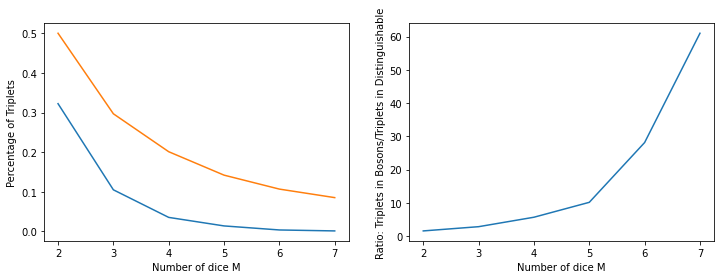

In [36]:
fig = plt.figure(figsize=(12,4))
ax1, ax2 = [fig.add_subplot(1,2,i+1) for i in range(2)]

ax1.plot(xx, dist_yy)
ax1.plot(xx, bos_yy)
ax1.set_xlabel("Number of dice M")
ax1.set_ylabel("Percentage of Triplets")

ax2.plot(xx, bos_yy/dist_yy)
ax2.set_xlabel("Number of dice M")
ax2.set_ylabel("Ratio: Triplets in Bosons/Triplets in Distinguishable")

plt.show()